In [34]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
import seaborn as sns
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: title={'center': 'fraud vs normal'}, xlabel='Class'>

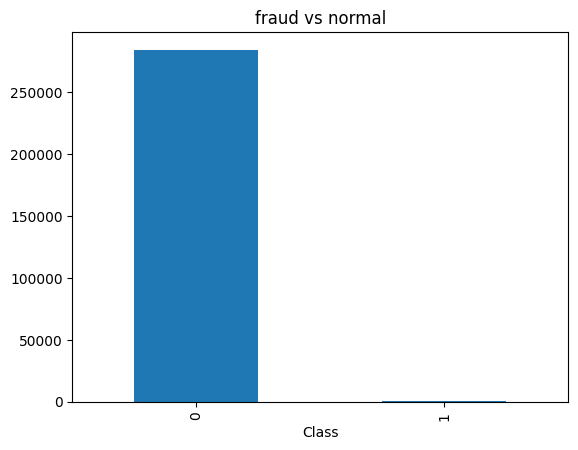

In [5]:
# Plotting the Imbalance in the Dataset

data['Class'].value_counts().plot(kind='bar', title='fraud vs normal')

Text(0.5, 1.0, 'Transaction Amount Distribution')

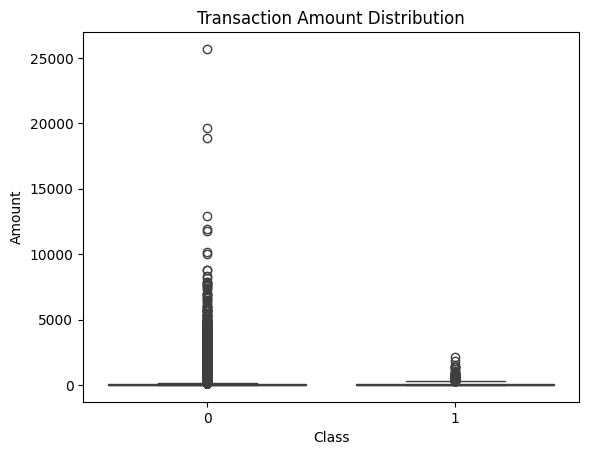

In [36]:
# Distribution of Amounts

sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amount Distribution")

Text(0.5, 1.0, 'Fraud Vs Non-Fraud')

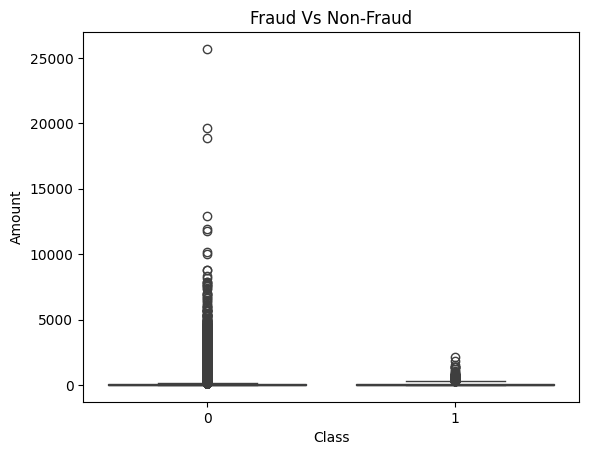

In [37]:
# fraud VS Non Fraud

sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Fraud Vs Non-Fraud")


Text(0.5, 0, 'Time (hours)')

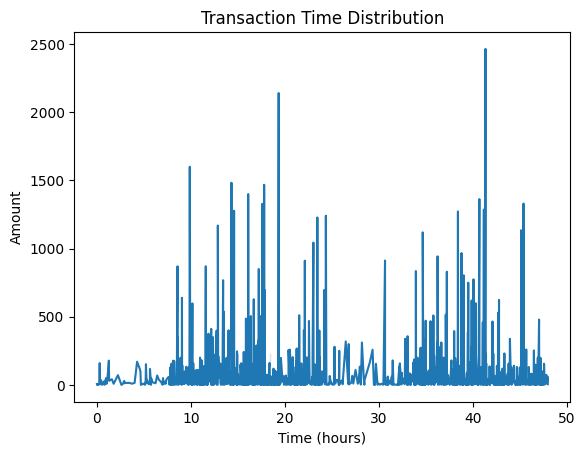

In [44]:
# Time when Most fraud occurs

data['Time_hours'] = data['Time'] / 3600

sns.lineplot(x='Time_hours', y='Amount', data=data.sample(1500))
plt.title("Transaction Time Distribution")
plt.xlabel("Time (hours)")


<Axes: xlabel='Time_hours', ylabel='Density'>

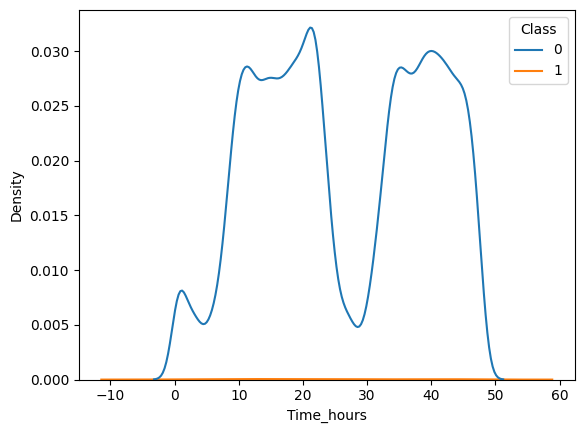

In [ ]:
# Fraud time vs Normal Time

sns.kdeplot(data=data, x='Time_hours', hue='Class')

In [6]:
# Spliting the Data into Train and Test Set

X = data.drop("Class", axis=1)
y = data["Class"]

num_features = ["Amount"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features)
    ],
    remainder="passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

Model Training


Logistic Regression

In [7]:
# # Logistic Regression

# lg_reg = LogisticRegression(penalty='elasticnet',
#                               solver='saga',
#                               l1_ratio=0.5,
#                               class_weight='balanced',
#                               max_iter=500,
#                               random_state=42)
# lg_reg.fit(X_train, y_train)

In [8]:
# y_pred = lg_reg.predict(X_test)

In [9]:
    # # Precision, Recall and F1 Score
    # print("Precision_score : ", precision_score(y_test, y_pred))
    # print("Recall_score : ", recall_score(y_test, y_pred))
    # print("F1_score : ", f1_score(y_test, y_pred))

In [10]:
# # Saving the model

# with open("logistic_reggression_fraud_model.pk1", "wb") as file:
#   pickle.dump(lg_reg, file)

Linear SVC

In [11]:
# # Using Linear SVC

# len_svc_clf = LinearSVC(C=1,
#                         class_weight="balanced",
#                         max_iter=5000,
#                         random_state=42)
# len_svc_clf.fit(X_train, y_train)

In [12]:
# # Using Linear SVC

# len_svc_clf = LinearSVC(C=1,
#                         class_weight="balanced",
#                         max_iter=5000,
#                         random_state=42)
# len_svc_clf.fit(X_train, y_train)

In [13]:
# print("Precision score : ", precision_score(y_test, y_pred))
# print("Recall score : ", recall_score(y_test, y_pred))
# print("F1 score : , ", f1_score(y_test, y_pred))

In [14]:
# Saving the Model

# with open("linear_svm_model.pk1","wb") as file:
#     pickle.dump(len_svc_clf, file)

RandomForestClassifier

In [15]:
# # Using RandomForestClassifier

# rnd_clf = RandomForestClassifier(n_estimators=200,
#                                  max_samples=0.8,
#                                  class_weight='balanced',
#                                  random_state=42,
#                                  n_jobs=-1)
# rnd_clf.fit(X_train, y_train)

In [16]:
# y_pred = rnd_clf.predict(X_test)

In [17]:
# # Precision, Recall and F1 scores

# print("Precision score : ",precision_score(y_test, y_pred))
# print("Recall score : ", recall_score(y_test, y_pred))
# print("F1 score : ", f1_score(y_test, y_pred))

In [18]:
# Saving the model

# with open("Random_forest_fraud_model.pk1","wb") as file:
#     pickle.dump(rnd_clf,file)

XGBoost


In [19]:
scale_pos_weight = 2 * (y_train.value_counts()[0] / y_train.value_counts()[1])


In [20]:
# # Using XGBOOST CLassifier

# xgb_model = XGBClassifier(
#     n_estimators=300,
#     max_depth=5,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     scale_pos_weight=scale_pos_weight,
#     objective="binary:logistic",
#     eval_metric="logloss",
#     random_state=42,
#     n_jobs=-1
# )

# xgb_model.fit(X_train, y_train)

In [21]:
# y_pred = xgb_model.predict(X_test)

In [22]:
# print("Precision score : ",precision_score(y_test, y_pred))
# print("Recall score : ", recall_score(y_test, y_pred))
# print("F1 score : ", f1_score(y_test, y_pred))

In [23]:
# Saving Model

# with open("XGB_Model.pk1", "wb") as file:
#     pickle.dump(xgb_model, file)

AdaBoost

In [24]:
# Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
#                             n_estimators=300,
#                             learning_rate=0.5,
#                             random_state=42)


Running all Models

In [25]:
param_grid = [

    {
        # Logistic Regression
        "model" : [LogisticRegression()],
        "model__penalty" : ["elasticnet"],
        "model__solver" : ["saga"],
        "model__l1_ratio" : [0.1,0.5,0.9],
        "model__C" : [0.01,0.1,1,10],
        "model__class_weight" : ["balanced"],
        "model__max_iter" : [500],
        "model__random_state" : [42]
    },
    

    {
        # RandomForestClassifier
        "model" : [RandomForestClassifier()],
        "model__n_estimators" : [500, 800],
        "model__bootstrap" : [True],
        "model__max_samples" : [0.5, 0.8, None],
        "model__max_features" : ["sqrt", 0.5],
        "model__class_weight" : ["balanced"],
        "model__n_jobs" : [-1],
        "model__random_state" : [42]
    },

    {
        # XGBoostClassifier
        "model" : [XGBClassifier()],
        "model__n_estimators" : [500, 800],
        "model__max_depth" : [4,5,6],
        "model__learning_rate" : [0.01, 0.03, 0.05, 0.1],
        "model__subsample" : [0.7,0.8,0.9],
        "model__colsample_bytree": [0.7, 0.8, 0.9],
        "model__objective" : ["binary:logistic"],
        "model__eval_metric" : ["logloss"],
        "model__scale_pos_weight" : [scale_pos_weight],
        "model__use_label_encoder" : [False],
        "model__random_state" : [42],
        "model__n_jobs" : [-1]
        
    },

    {
        # AdaBoostClassifier
        "model" : [AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                     random_state=42)],
        "model__n_estimators" : [500, 800],
        "model__learning_rate" : [0.01, 0.03, 0.05, 0.1],
    }
]

In [26]:
# Using Pipeline

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression())
])

In [27]:
# Using RandomizedSearchCv

rnd_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    random_state=42
)

rnd_search.fit(X_train, y_train)

/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/sklearn/linear_model/_logist

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","[{'model': [LogisticRegression()], 'model__C': [0.01, 0.1, ...], 'model__class_weight': ['balanced'], 'model__l1_ratio': [0.1, 0.5, ...], ...}, {'model': [RandomForestClassifier()], 'model__bootstrap': [True], 'model__class_weight': ['balanced'], 'model__max_features': ['sqrt', 0.5], ...}, ...]"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",25
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are inst

In [28]:
best_model = rnd_search.best_estimator_

In [29]:
y_proba = best_model.predict_proba(X_test)[:,1]

threshold = 0.45

y_pred = (y_proba >= threshold).astype(int)

In [ ]:
scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring="recall"

)

print("cross_validation_score",scores)
print("Average CV Scores", scores.mean())

/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:03:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:03:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [12:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/deepakpraveen/Documents/project/fraud_detection/frd/lib/python3.13/site-packages/xgboost/training.py:1

cross_validation_score [0.83333333 0.94936709 0.86075949 0.87341772 0.91139241]
Average CV Scores 0.8856540084388186


In [31]:
print("Precision Score of best Model ")
print("precision_score : ", precision_score(y_test, y_pred))
print("recall_score : ", recall_score(y_test, y_pred))
print("f1_score : ", f1_score(y_test, y_pred))

Precision Score of best Model 
precision_score :  0.10827250608272507
recall_score :  0.9081632653061225
f1_score :  0.1934782608695652
